# Training classifiers from folders of images
When training pixel classifiers it often makes sense to train using multiple images. For example, when images look differently, especially between conditions, it is necessary to train classifiers with mutiple images from all conditions.

In this notebook we demonstrate how to train [APOC](https://github.com/haesleinhuepf/apoc) classifiers using two folders containing pairs of training data.

In [1]:
import apoc
import os
from skimage.io import imread
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

## Data preparation
We start by selecting two input folders. One with images, and one with sparsely annotated label images. The names of the files in that folder must be pairwise identical. We will also have a quick look into these folders.

For demonstration purposes, we reuse data of the [BBBC007 dataset](https://bbbc.broadinstitute.org/BBBC007) version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083).

In [2]:
image_folder = "../demo/folder/images/"
masks_folder = "../demo/folder/masks/"

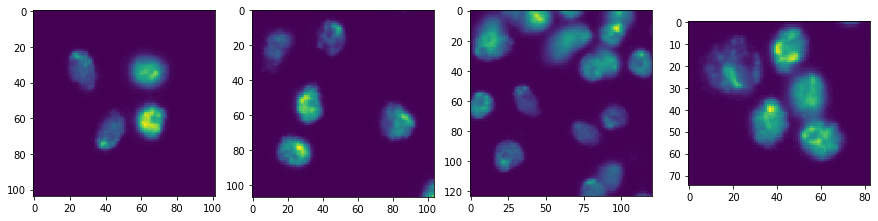

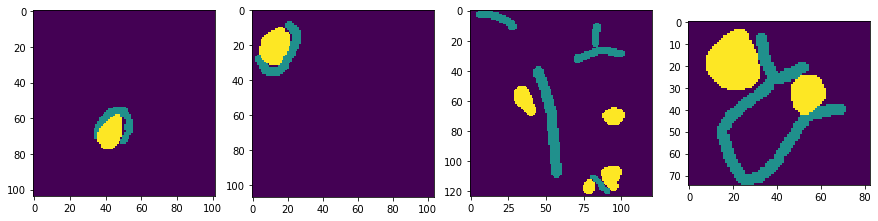

In [3]:
file_list = os.listdir(image_folder)

# show all images
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for i, filename in enumerate(file_list):
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[i])
plt.show()
    
# show corresponding label images
fig, axs = plt.subplots(1, 4, figsize=(15,15))
for i, filename in enumerate(file_list):
    masks = imread(masks_folder + filename)
    cle.imshow(masks, plot=axs[i])
plt.show()


## Training
If the folders are setup properly, we can pass the folders to the training.

In [4]:
# setup classifer and where it should be saved
segmenter = apoc.ObjectSegmenter(opencl_filename="test.cl")

# setup feature set used for training
features = apoc.PredefinedFeatureSet.object_size_1_to_5_px.value

# train classifier on folders
apoc.train_classifier_from_image_folders(
    segmenter, 
    features, 
    image = image_folder, 
    ground_truth = masks_folder)

## Prediction
After the training, we can apply the classifier to all images in the image folder. The following line reloads the classifier from disk. In that way we can ensure that it was stored correctly.

In [5]:
segmenter = apoc.ObjectSegmenter(opencl_filename="test.cl")

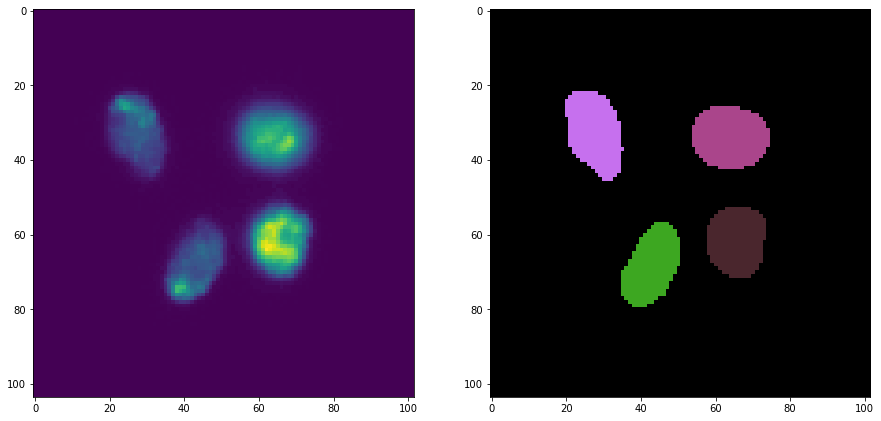

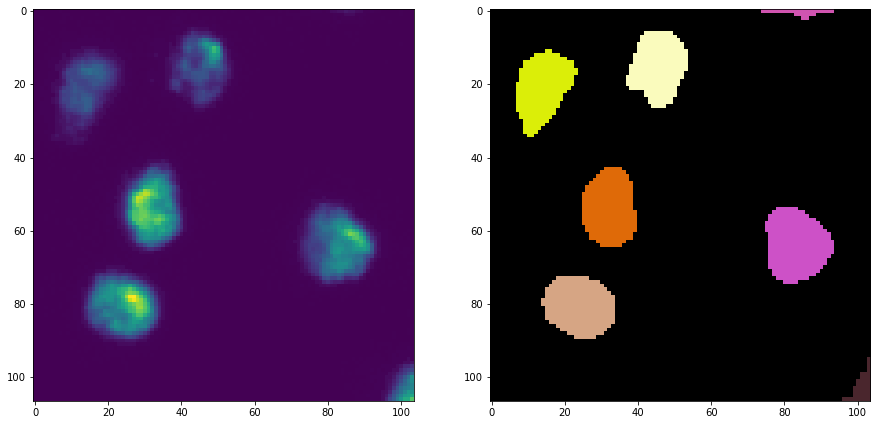

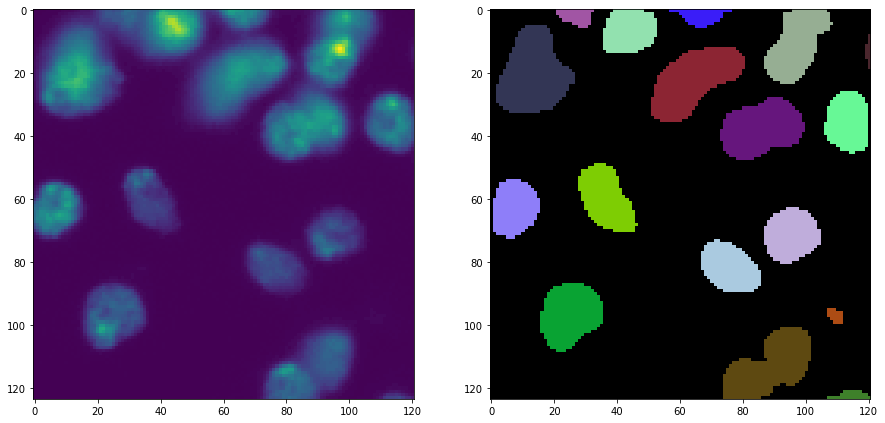

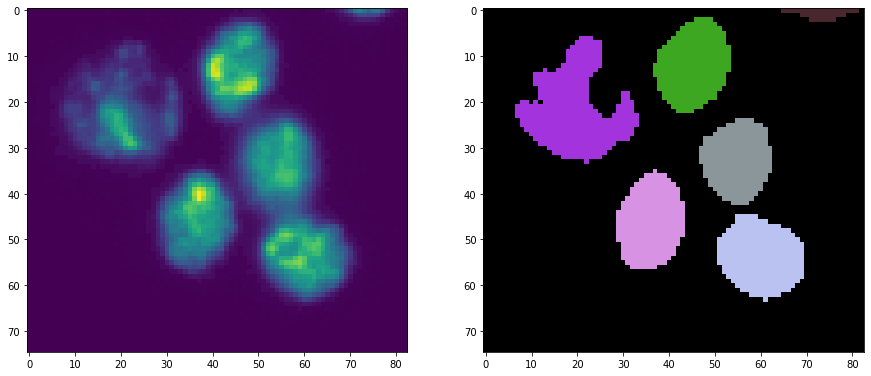

In [6]:
# show all images
for i, filename in enumerate(file_list):
    fig, axs = plt.subplots(1, 2, figsize=(15,15))
    
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[0])
    
    labels = segmenter.predict(image)
    cle.imshow(labels, plot=axs[1], labels=True)
    
    plt.show()